### Bilateral filter

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

def load_image(path):
    im = cv2.imread("./imgs/"+path)
    return im

def save_image(img, path):
    cv2.imwrite("./results/"+path, img)

### Loading test images

In [2]:
arch = load_image("arch.png")
samurai = load_image("7samurai_s.jpg")
peppers = load_image("peppers.png")
lena = load_image("lena.jpg")
museum = load_image("museum_s.jpg")

### Weight computations

In [3]:
#space weight
def gaussian(sigma, k):
    v = []
    for i in range(k):
        l = i - k//2
        g = np.exp(-(l*l) / (2 * (sigma**2)))
        v.append(g)
    return v

In [4]:
#range weight
def gaussianB(px,center,sigmab,log=False):
    diff = abs(px - center)
    if(log):
        diff = (np.log(px+1)-np.log(center+1))*255

    g = np.exp(-(diff*diff) / (2 * (sigmab**2)))
    return g

0.029421088428327302 0.19789869908361465


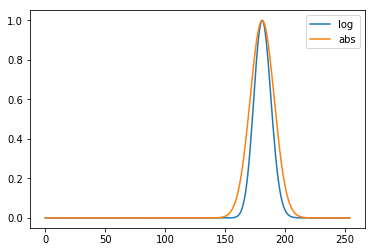

In [5]:
### test normalizace
center = 181
log=False
sigmab = 10

v = []
m = []
for i in range(0,255):
    v.append(gaussianB(i,center,sigmab,True))
    m.append(gaussianB(i,center,sigmab,False))
    
plt.plot(v)
plt.plot(m)
plt.legend(["log","abs"])
print(v[163],m[163])

### Filtering

In [162]:

def convolution(img,k,sigmaG, sigmab,log=False):
    n,m,c = img.shape
    final = np.zeros((n,m,c))
    half = k//2

    #space weight vector
    v = gaussian(sigmaG,k)
    v = np.outer(v,v) # not normalized
    

    for channel in range(c):
        # adding padding to edges
        d,e = np.pad(img[:,:,channel].copy(), half, 'reflect').shape
        im = img[:,:,channel].copy()
        #empty array for new data
        conv = np.zeros((n,m))
        
        for (x,y), pix in np.ndenumerate(np.zeros((n,m))):
            pix_val = 0.0
            W = 0.0
            center = im[x,y]
            for (k,l), val in np.ndenumerate(v):
                im_pos_x = abs(x-(k-half))
                im_pos_y = abs(y-(l-half))
                if(im_pos_x >= n):
                    im_pos_x += (n - im_pos_x - 1) 
                if(im_pos_y >= m):
                    im_pos_y += (m - im_pos_y - 1) 
                im_pix = im[im_pos_x,im_pos_y]
                gaussB = gaussianB(im_pix, center, sigmab, log)
                W += val*gaussB
                pix_val += im_pix * val * gaussB
                
            conv[x,y] = pix_val/W  #normalization factor


        # cutting of padding
        final[:,:,channel] = conv
    
    final = final.astype(int)
    return final

In [163]:
f = gaussian(1.5,9)

In [ ]:
# sigma and kernel size computation
sigma = 1.5
ker = int(6*sigma)
ker += ker%2==0 and 1 or 0
sigmaB = 10
print(sigma, ker, sigmaB)
print(gaussianB(164,181,10,True))
33res = convolution(museum, ker,sigma, sigmaB, True)

### Runs

In [ ]:
images = [peppers]
names = ["peppers"]

for sigmaB in [10,50,250]:
    for sigma in [3,5,10]:
        for im, name in zip(images, names):
            ker = int(6*sigma)
            ker += ker%2==0 and 1 or 0
            res = convolution(im, ker, sigma, sigmaB, False);
            save_image(res,name+" "+str(sigma)+"_"+str(sigmaB)+".jpg")
            

In [ ]:
images = [museum]
names = ["museum"]

for sigma in [5]:
    for l in [False, True]:
        for sigmaB in [5,10,50,150]:
            for im, name in zip(images, names):
                ker = int(6*sigma)
                ker += ker%2==0 and 1 or 0
                res = convolution(im, ker, sigma, sigmaB, True);
                if(l):
                    save_image(res,name+" "+str(sigma)+"_"+str(sigmaB)+"_log.jpg")
                else:
                    save_image(res,name+" "+str(sigma)+"_"+str(sigmaB)+".jpg")
           